# EDA

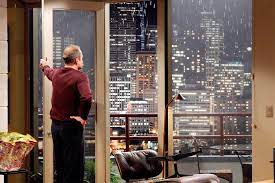

In [3]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_data = pd.read_csv('data/eda.csv')
df_house = df_data.copy()
df_client = df_data.copy()
df_plot = df_data.copy()

In [3]:
df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [53]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Timothy Stevens: Owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits
Hypothesis that come to mind are the following:


In [15]:
# Checking the description of my data...

df_house.describe()

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [16]:
# Above I have the descriptio, with this I can take a look at my key variables

In [65]:
# Too many ids i am drop them using the drop()
df_house = df_house.drop(columns=['id', 'id.1'])

In [54]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [55]:
df_house.shape

(21597, 23)

In [64]:
# Checking for duplicates in my data.
df_house.duplicated().value_counts()

# There is no duplicates in the Dataframe..... Next willl be to check the types of data I have. 

False    21597
Name: count, dtype: int64

In [56]:
df_house.dtypes

date              object
price            float64
house_id           int64
id                 int64
id.1               int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [57]:
type(df_house['date'][0])

str

In [22]:
# This was use to change my data to a datetime from object 
df_house['date'] = pd.to_datetime(df_house['date'], format='%Y-%m-%d')

In [58]:
df_house.dtypes

date              object
price            float64
house_id           int64
id                 int64
id.1               int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [23]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     19206 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21145 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1774

In [24]:
df_house.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [16]:
import missingno as msno

In [25]:
df_house.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [26]:
df_house.waterfront.value_counts(dropna=False)

waterfront
0.000    19060
NaN       2391
1.000      146
Name: count, dtype: int64

In [59]:

# # Numeric columns
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement',
            'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'price']

df_house[num_cols] = df_house[num_cols].fillna(df_house[num_cols].median())

# Categorical columns
cat_cols = ['waterfront', 'zipcode']
for col in cat_cols:
    df_house[col] = df_house[col].fillna(df_house[col].mode()[0])

# Fix yr_renovated
df_house['yr_renovated'] = pd.to_numeric(df_house['yr_renovated'], errors='coerce').fillna(0)
df_house.loc[df_house['yr_renovated'] > 2025, 'yr_renovated'] = 0
df_house['yr_renovated'] = df_house['yr_renovated'].astype(int)

# Date column
df_house['date'] = pd.to_datetime(df_house['date'])  # automatically parses correctly
df_house.isna().sum()

date             0
price            0
house_id         0
id               0
id.1             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
# # reload raw (change filename to yours)
# df_house_raw = pd.read_csv("Ydata/eda.csv")

# # safe renovation cleaning
# df_house_raw['yr_renovated'] = pd.to_numeric(df_house_raw['yr_renovated'], errors='coerce').fillna(0)

# current_year = 2025
# df_house_raw.loc[(df_house_raw['yr_renovated'] < 0) | (df_house_raw['yr_renovated'] > current_year), 'yr_renovated'] = 0
# df_house_raw['yr_renovated'] = df_house_raw['yr_renovated'].astype(int)

# df_house_raw['renovation_status'] = df_house_raw['yr_renovated'].gt(0).map({False:'Not Renovated', True:'Renovated'})
# df_house_raw['renovation_status'].value_counts()

In [11]:
# current_year = 2025  # or datetime.now().year

# # 1) Convert to numeric safely
# yr = pd.to_numeric(df_house['yr_renovated'], errors='coerce')

# # 2) Fix only values with the scaling issue (e.g. 20150 → 2015)
# mask_scaled = (
#     yr.notna() &
#     (yr > current_year) &
#     (yr % 10 == 0)
# )

# yr.loc[mask_scaled] = yr.loc[mask_scaled] / 10

# # 3) Mark still-impossible years as NA (do NOT force to 0)
# yr.loc[
#     (yr < 0) |
#     (yr > current_year),
# ] = pd.NA

# # 4) Convert to nullable integer (keeps NA)
# df_house['yr_renovated'] = yr.astype('Int64')

In [60]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   id.1           21597 non-null  int64         
 5   bedrooms       21597 non-null  float64       
 6   bathrooms      21597 non-null  float64       
 7   sqft_living    21597 non-null  float64       
 8   sqft_lot       21597 non-null  float64       
 9   floors         21597 non-null  float64       
 10  waterfront     21597 non-null  float64       
 11  view           21597 non-null  float64       
 12  condition      21597 non-null  int64         
 13  grade          21597 non-null  int64         
 14  sqft_above     21597 non-null  float64       
 15  sqft_basement  2159

In [61]:
# Convert columns to int
cols_to_int = [
    'price', 'house_id', 'bedrooms', 'floors',
    'waterfront', 'view', 'grade',
    'sqft_above', 'sqft_basement',
    'yr_built', 'zipcode'
]

df_house[cols_to_int] = df_house[cols_to_int].round(0).astype(int)



# Handle bedroom outliers
df_house['bedroom_outlier'] = df_house['bedrooms'] > 10

# Zipcode as category
df_house['zipcode'] = df_house['zipcode'].astype(str)

In [68]:
# cols_to_int = [
#     'price', 'house_id', 'bedrooms', 'floors', 'waterfront',
#     'view', 'sqft_above', 'sqft_basement',
#     'yr_built', 'yr_renovated', 'zipcode'
# ]

# df_house[cols_to_int] = df_house[cols_to_int].round(0).astype(int)

In [62]:
df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
0,2014-10-13,221900,7129300520,1,7129300520,3,1.000,1180.000,5650.000,1,...,1180,0,1955,0,98178,47.511,-122.257,1340.000,5650.000,False
1,2014-12-09,538000,6414100192,2,6414100192,3,2.250,2570.000,7242.000,2,...,2170,400,1951,0,98125,47.721,-122.319,1690.000,7639.000,False
2,2015-02-25,180000,5631500400,3,5631500400,2,1.000,770.000,10000.000,1,...,770,0,1933,0,98028,47.738,-122.233,2720.000,8062.000,False
3,2014-12-09,604000,2487200875,4,2487200875,4,3.000,1960.000,5000.000,1,...,1050,910,1965,0,98136,47.521,-122.393,1360.000,5000.000,False
4,2015-02-18,510000,1954400510,5,1954400510,3,2.000,1680.000,8080.000,1,...,1680,0,1987,0,98074,47.617,-122.045,1800.000,7503.000,False


In [23]:
(df_house['yr_renovated'] > 0).sum()
df_house['yr_renovated'].value_counts().head(20)

yr_renovated
0    21597
Name: count, dtype: int64

#### Analyze price distribution
Reasoning:
- Price is our target variable
- Check if distribution is skewed (many affordable vs few expensive)
- Identify outliers


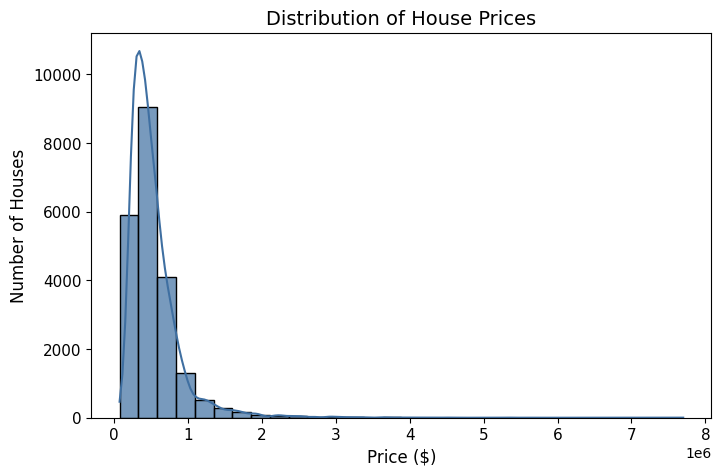

In [24]:
plt.figure(figsize=(8,5))

# Histogram with density curve
sns.histplot(
    df_house['price'], 
    bins=30, 
    kde=True,            # adds smooth density curve
    color="#3F6FA1",     # better color for presentation
    edgecolor="black",   # outlines bars for clarity
    alpha=0.7            # slightly transparent
)

# Titles and labels
plt.title("Distribution of House Prices", fontsize=14)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

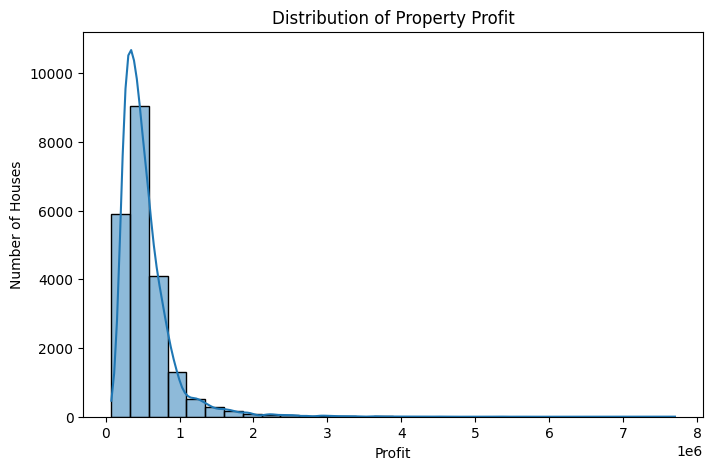

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df_house['price'], bins=30, kde=True)
plt.title("Distribution of Property Profit")
plt.xlabel("Profit")
plt.ylabel("Number of Houses")
plt.show()

In [28]:
# df_house['renovated'] = (df_house['yr_renovated'] > 0).astype(int)
# df_house['month_sold'] = df_house['date'].dt.month
# df_house

In [26]:
# Central houses sell at higher prices
# To get this I  will be groupby zipcode and price to determine the locations with higher price values  

df_house.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)

zipcode
98039   2161300.000
98004   1356523.991
98040   1194873.638
98112   1096239.007
98102    899607.673
98109    880077.752
98105    863228.943
98006    859938.554
98119    849714.810
98005    810289.696
Name: price, dtype: float64

 Average Price by Location (Zipcode)

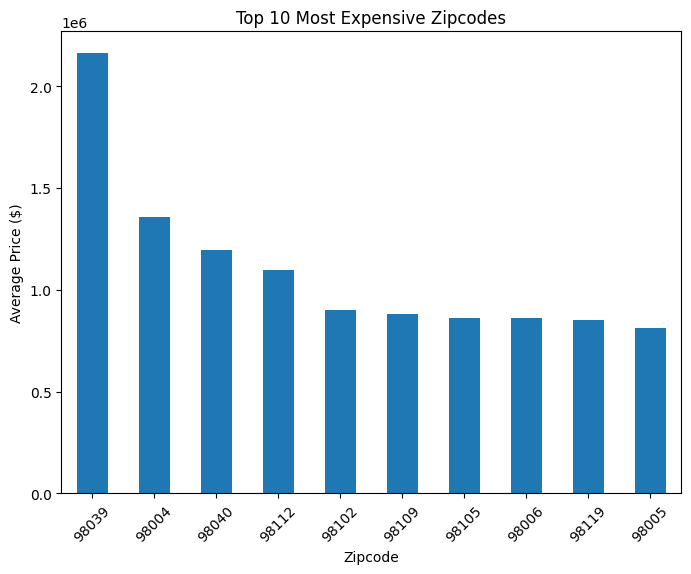

In [27]:
# Do some areas have much higher prices?
# I don't know if this below will be relevant yet so i willl keep it .... but comment it out.

top_zip_prices = (
    df_house
    .groupby('zipcode')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,6))
top_zip_prices.plot(kind='bar')
plt.title('Top 10 Most Expensive Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [30]:
# central_zipcodes = [98109, 98101, 98104, 98119,]

# df_house['central_area'] = df_house['zipcode'].isin(central_zipcodes)

# df_house.boxplot(column='price', by='central_area', figsize=(8,6))
# plt.title('Price: Central vs Non-Central Areas')
# plt.suptitle('')
# plt.xlabel('Central Area')
# plt.ylabel('Price')
# plt.show()


# I am not sure I need really need the above 

##### Compare prices of renovated vs Non-renovated houses.

In [28]:
df_house.groupby('yr_renovated')['price'].median()

yr_renovated
0   450000.000
Name: price, dtype: float64

#### Waterfront influence
Waterfront vs Price

Reasoning:
- Waterfront houses may have higher prices
- Understand locational premium

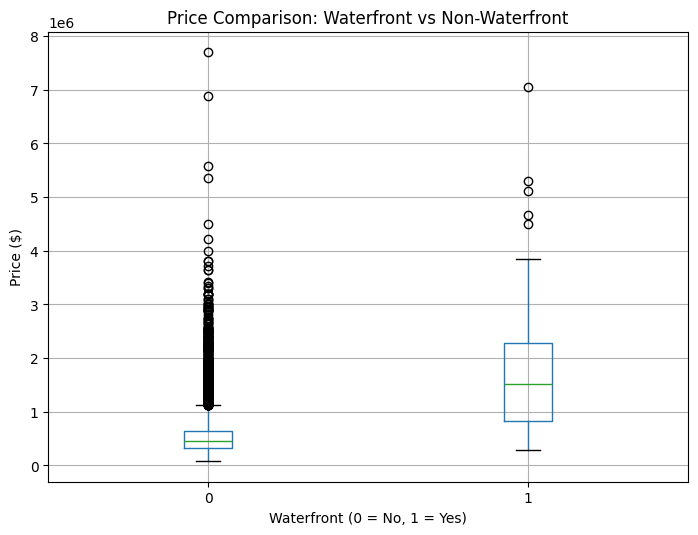

In [29]:
# Does location quality increase prices (Waterfront)

df_house.boxplot(column='price', by='waterfront', figsize=(8,6))
plt.title('Price Comparison: Waterfront vs Non-Waterfront')
plt.suptitle('')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price ($)')
plt.show()

In [30]:
df_house.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedroom_outlier'],
      dtype='object')

In [31]:
df_waterfront = df_house.groupby('waterfront')['price'].mean()

In [66]:
#df_house['waterfront'] = df_house['waterfront'].map({0: 'No', 1: 'Yes'})

fig = px.box(
    df_house,
    x='waterfront',
    y='price',
    color='waterfront',
    width=1000,
    height=550,
    labels={
        'waterfront': 'Waterfront Property',
        'price': 'House Price (USD)'
    },
    color_discrete_sequence=['#4C78A8', '#F58518']
)

fig.update_traces(
    boxmean=True,
    marker=dict(opacity=0.7)
)

fig.update_layout(
    title={
        'text': 'Waterfront Homes Sell at Higher Prices',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22}
    },
    plot_bgcolor='white',
    paper_bgcolor='white',
    yaxis=dict(
        tickprefix='$',
        tickformat=',',
        gridcolor='lightgrey'
    ),
    showlegend=False
)

fig.show()

#### Geographical Overview
 
Price Distribution on Map (Latitude & Longitude)

Reasoning:
- Visualize clusters of expensive/cheap houses
- Identify spatial distribution trends

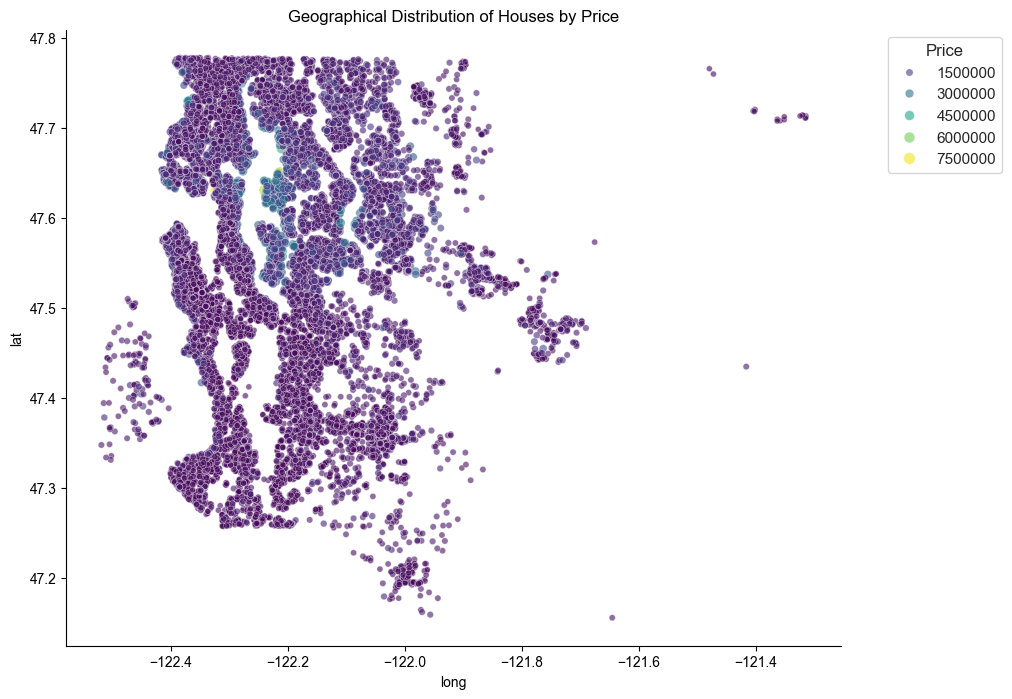

<Figure size 1000x800 with 0 Axes>

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(
    x='long', y='lat', 
    size='price', hue='price', 
    data=df_house, 
    palette='viridis', 
    alpha=0.6,
    ax=ax 

)
#plt.title('Geographical Distribution of Houses by Price')
ax.set_title('Geographical Distribution of Houses by Price')
ax.legend(
    title="Price",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which="minor", linewidth=0.25)
sns.despine(left=False, bottom=False)
plt.show()


#### Feature relationships
Reasoning:
- Explore how features like sqft, bedrooms, grade relate to price
- Identify key factors influencing value


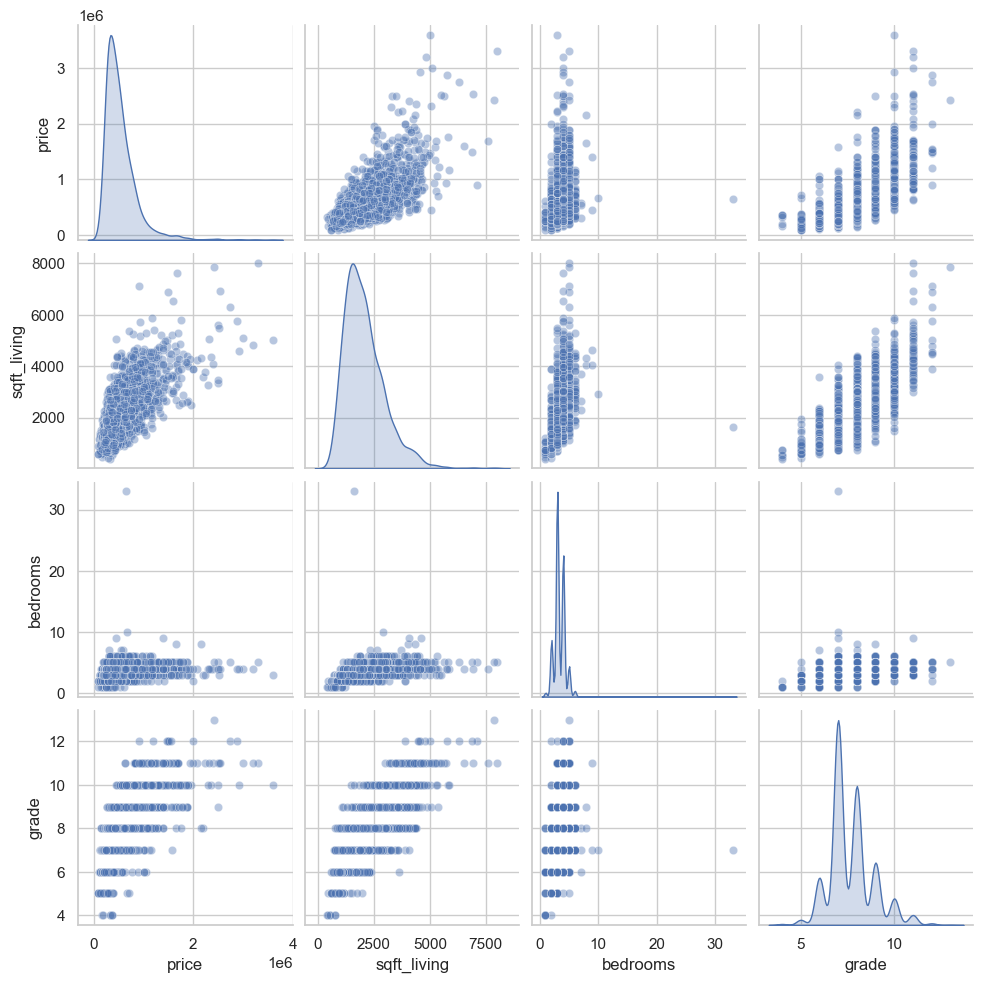

In [34]:
sample_df = df_house.sample(3000, random_state=42)

sns.pairplot(
    sample_df[['price', 'sqft_living', 'bedrooms', 'grade']],
    diag_kind='kde',
    plot_kws={'alpha': 0.4}
)

plt.show()


#### A General Overview of the Impact of Renovation

Reasoning:

- House Price: Renovated vs Not Renovated

In [35]:
import pandas as pd

# Keep only known renovation status
df_plot = df_house.dropna(subset=['yr_renovated']).copy()

# Binary flag
df_plot['renovation_status'] = df_plot['yr_renovated'].apply(
    lambda x: 'Not Renovated' if x == 0 else 'Renovated'
)

In [36]:
import plotly.express as px

fig = px.box(
    df_plot,
    x='renovation_status',
    y='price',
    points='outliers',   # show outliers cleanly
    width=1000,
    height=550,
    title='House Prices: Renovated vs Not Renovated',
    labels={
        'renovation_status': 'Renovation Status',
        'price': 'House Price ($)'
    }
)

# Log scale for skewed prices
fig.update_yaxes(type='log', tickformat=",.0f")

fig.show()


#### General Data Hypotheses

1. Price Distribution Hypothesis: Prices are skewed with few extremely high-value homes.
2. Feature Impact Hypothesis: Larger homes and higher-grade houses are more expensive.
3. Waterfront Hypothesis: Waterfront properties command higher prices.





### B) Client-Specific Analysis (Timothy Stevens)


#### Houses in the City-center
Filter for client's city-center houses

Reasoning:
- Client owns houses only in city center
- Focus only on relevant data to generate accurate insights


Descriptive statistics for client houses

Reasoning:
- Understand client's portfolio (avg size, bedrooms, bathrooms, price range)
- Identify anomalies


In [67]:
df_house

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
0,2014-10-13,221900,7129300520,3,1.000,1180.000,5650.000,1,0,0,...,1180,0,1955,0,98178,47.511,-122.257,1340.000,5650.000,False
1,2014-12-09,538000,6414100192,3,2.250,2570.000,7242.000,2,0,0,...,2170,400,1951,0,98125,47.721,-122.319,1690.000,7639.000,False
2,2015-02-25,180000,5631500400,2,1.000,770.000,10000.000,1,0,0,...,770,0,1933,0,98028,47.738,-122.233,2720.000,8062.000,False
3,2014-12-09,604000,2487200875,4,3.000,1960.000,5000.000,1,0,0,...,1050,910,1965,0,98136,47.521,-122.393,1360.000,5000.000,False
4,2015-02-18,510000,1954400510,3,2.000,1680.000,8080.000,1,0,0,...,1680,0,1987,0,98074,47.617,-122.045,1800.000,7503.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000,263000018,3,2.500,1530.000,1131.000,3,0,0,...,1530,0,2009,0,98103,47.699,-122.346,1530.000,1509.000,False
21593,2015-02-23,400000,6600060120,4,2.500,2310.000,5813.000,2,0,0,...,2310,0,2014,0,98146,47.511,-122.362,1830.000,7200.000,False
21594,2014-06-23,402101,1523300141,2,0.750,1020.000,1350.000,2,0,0,...,1020,0,2009,0,98144,47.594,-122.299,1020.000,2007.000,False
21595,2015-01-16,400000,291310100,3,2.500,1600.000,2388.000,2,0,0,...,1600,0,2004,0,98027,47.535,-122.069,1410.000,1287.000,False


In [ ]:
# city_center_zipcodes = ['98101', '98104', '98109']
# df_house[df_house['zipcode'].isin(city_center_zipcodes)]

In [69]:
city_center_zipcodes = ['98101', '98104', '98109']  # example zipcodes
df_client = df_house[df_house['zipcode'].isin(city_center_zipcodes)]

df_client

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
146,2014-06-25,890000,809001525,4,1.000,2550.000,4000.000,2,0,0,...,2370,180,1905,0,98109,47.635,-122.353,2200.000,4000.000,False
568,2014-10-22,610000,809002765,3,1.000,1180.000,3400.000,2,0,0,...,1180,0,1907,0,98109,47.638,-122.353,1440.000,3400.000,False
1064,2015-01-23,550000,809001070,3,1.000,1520.000,2500.000,2,0,0,...,1520,0,1912,0,98109,47.635,-122.352,1880.000,3600.000,False
1096,2015-05-13,453500,5457300478,2,1.750,1000.000,1760.000,1,0,0,...,600,400,1924,0,98109,47.626,-122.355,2120.000,2802.000,False
1147,2014-08-08,725000,809002435,3,2.500,1940.000,4000.000,2,0,0,...,1940,0,1906,0,98109,47.637,-122.352,1440.000,4000.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,2015-03-31,600000,3528900771,3,3.250,1690.000,1473.000,2,0,0,...,1380,310,2008,0,98109,47.640,-122.345,1670.000,2594.000,False
20917,2015-04-23,1550000,2652501565,3,3.250,3530.000,4920.000,2,0,0,...,2660,870,2015,0,98109,47.641,-122.357,1900.000,4200.000,False
20934,2015-03-23,605000,1689401526,3,2.500,1500.000,1119.000,3,0,2,...,1110,0,2008,0,98109,47.633,-122.346,1500.000,1057.000,False
21001,2014-07-23,550000,1972205633,3,2.000,1420.000,1369.000,2,0,0,...,1340,80,2007,0,98109,47.647,-122.357,1540.000,2168.000,False


In [70]:
df_client.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,109,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000,109.000
mean,2014-10-14 17:36:52.844036608,880077.752,3458919378.358,3.193,2.158,2054.780,3621.083,1.835,0.000,0.477,3.477,8.018,1637.349,397.156,1944.028,0.000,47.636,-122.350,1928.349,3605.725
min,2014-05-07 00:00:00,216650.000,52000067.000,1.000,1.000,630.000,713.000,1.000,0.000,0.000,3.000,6.000,600.000,0.000,1900.000,0.000,47.542,-122.357,1070.000,1057.000
25%,2014-07-02 00:00:00,620000.000,809003160.000,3.000,1.500,1450.000,2310.000,1.000,0.000,0.000,3.000,7.000,1140.000,0.000,1913.000,0.000,47.634,-122.354,1560.000,2960.000
50%,2014-09-25 00:00:00,736000.000,2721600125.000,3.000,2.000,1840.000,3600.000,2.000,0.000,0.000,3.000,8.000,1520.000,260.000,1925.000,0.000,47.637,-122.351,1850.000,3600.000
75%,2015-01-07 00:00:00,1000000.000,5457300478.000,4.000,2.750,2490.000,4775.000,2.000,0.000,0.000,4.000,9.000,1990.000,720.000,1990.000,0.000,47.641,-122.347,2230.000,4095.000
max,2015-05-13 00:00:00,3200000.000,9301301145.000,7.000,4.500,6210.000,8856.000,3.000,0.000,4.000,5.000,11.000,4760.000,1500.000,2015.000,0.000,47.648,-122.322,4400.000,7680.000
std,NaN,455700.754,2548552958.825,0.957,0.851,906.909,1692.663,0.601,0.000,0.958,0.740,1.122,683.522,423.620,39.750,0.000,0.014,0.006,568.801,1276.038


#### Price trends over time
Reasoning:
- Identify months with highest average sale prices
- Helps optimize selling timing


In [88]:
monthly_summary = df_client.groupby(df_client['date'].dt.month).agg(
    number_of_sales=('price', 'count'),
    average_price=('price', 'mean')
)

monthly_summary

,number_of_sales,average_price
date,,
1,8,826750.000
2,4,977000.000
3,6,707250.000
4,10,980520.000
5,14,1022219.643
6,12,989083.333
7,11,837268.182
8,10,799895.000
9,10,1063500.000


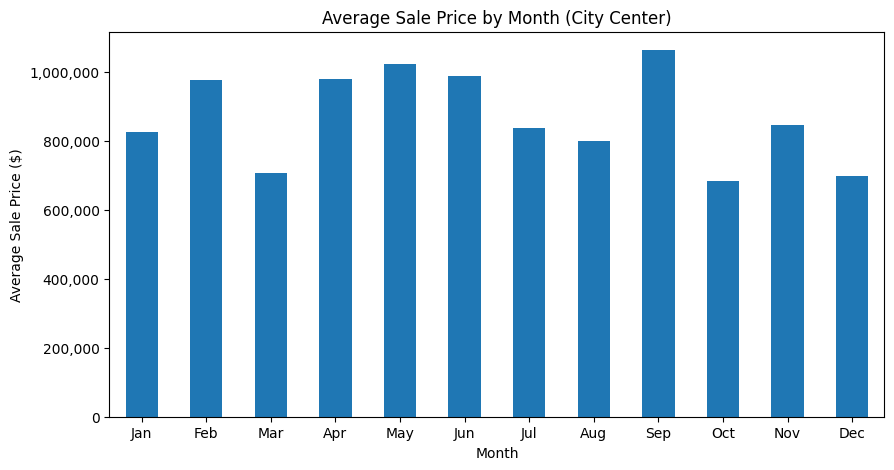

In [86]:


# Extract month number
df_client['sold_in_month'] = df_client['date'].dt.month

# Map month numbers to names
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}

# Calculate average price per month
monthly_avg_price = (
    df_client
    .groupby('sold_in_month')['price']
    .mean()
    .rename(index=month_map)
)
plt.figure(figsize=(10, 5))

monthly_avg_price.plot(kind='bar')

plt.title('Average Sale Price by Month (City Center)')
plt.xlabel('Month')
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=0)

# Format price axis nicely
plt.gca().yaxis.set_major_formatter(
    StrMethodFormatter('{x:,.0f}')
)

plt.show()

In [84]:
import plotly.express as px

# Extract month number
df_client['sold_in_month'] = df_client['date'].dt.month

# Map month numbers to names
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}

df_client['month_name'] = df_client['sold_in_month'].map(month_map)

# Calculate average price per month
monthly_avg_price = (
    df_client
    .groupby('month_name', as_index=False)['price']
    .mean()
)

# Ensure correct month order
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

fig = px.bar(
    monthly_avg_price,
    x='month_name',
    y='price',
    category_orders={'month_name': month_order},
    labels={
        'month_name': 'Month',
        'price': 'Average Sale Price ($)'
    },
    title='Average Sale Price by Month (City Center)',
    width=800,
    height=450
)

# Clean price formatting
fig.update_yaxes(tickformat=",")
fig.show()

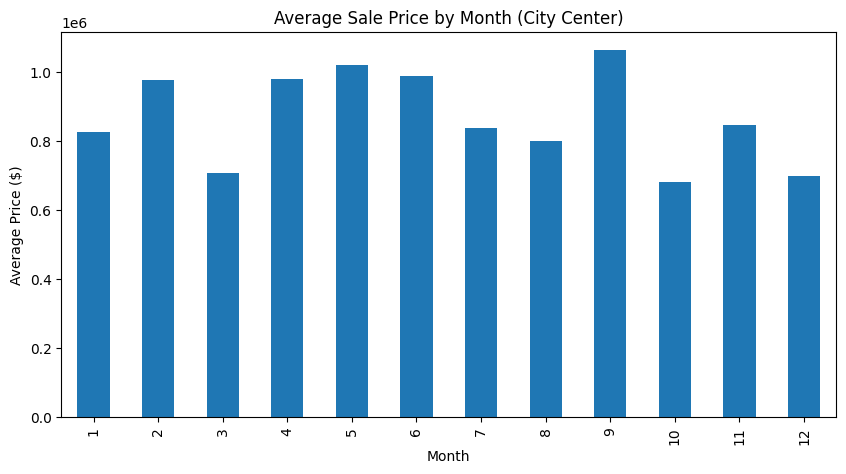

In [36]:
df_client['sold_in_month'] = df_client['date'].dt.month
monthly_sales = df_client.groupby('sold_in_month')['price'].mean()
monthly_sales.plot(kind='bar', figsize=(10,5), title='Average Sale Price by Month (City Center)')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.show()


In [77]:
df_client['sold_in_month'] = df_client['date'].dt.month

monthly_sales_df = (
    df_client
    .groupby('sold_in_month')['price']
    .mean()
    .reset_index()
)

monthly_sales_df.columns = ['sold_in_month', 'avg_price']

In [79]:
# Reset index to get a DataFrame
fig = px.bar(
    monthly_sales_df,
    x='sold_in_month',
    y='avg_price',
    color='avg_price',
    text='avg_price',
    labels={'sold_in_month':'Month', 'avg_price':'Average Price ($)'},
    title='Average Sale Price by Month (City Center)',
    height=500,
    width=900,
    color_continuous_scale='Viridis'
)

# Format axis and bar labels
fig.update_yaxes(tickformat=",.0f")
fig.update_traces(texttemplate='%{text:,.0f}')

fig.show()

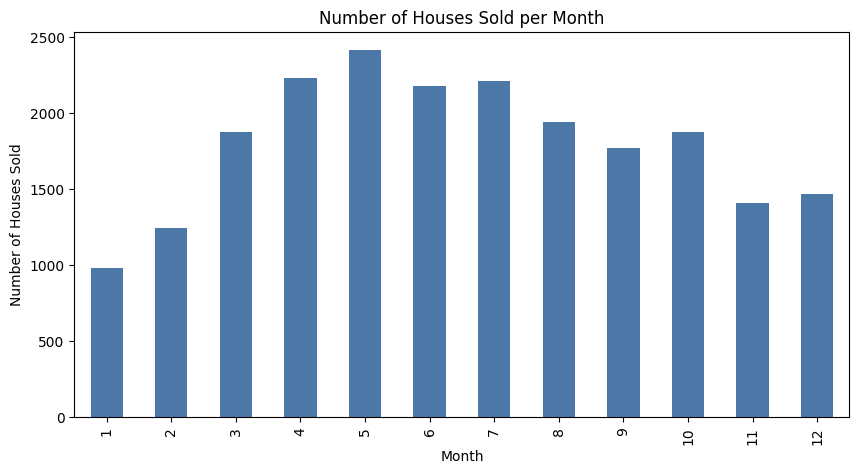

In [80]:
# Extract month from the date column
df_house['sold_in_month'] = df_house['date'].dt.month

# Group by month and count number of houses sold
monthly_sales = df_house.groupby('sold_in_month').size()

# Plot the monthly sales
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='#4C78A8')
plt.title('Number of Houses Sold per Month')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.show()

In [91]:
# Extract month name from the date column
df_house['sold_in_month'] = df_house['date'].dt.month_name()

# Group by month and count number of houses sold
monthly_sales = df_house.groupby('sold_in_month').size().reset_index(name='num_houses')

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['sold_in_month'] = pd.Categorical(monthly_sales['sold_in_month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('sold_in_month')

# Plot with Plotly
import plotly.express as px
fig = px.bar(
    monthly_sales, 
    x='sold_in_month', 
    y='num_houses',
    color='num_houses', 
    text='num_houses', 
    labels={'sold_in_month':'Month', 'num_houses':'Number of Houses Sold'},
    title='Number of Houses Sold per Month',
    height=500,
    width=900,
    color_continuous_scale='Viridis'
)
fig.show()

Best Timing to Sell (Seasonality) 
- This is not specific to my client but the general overview of the DataFrame, showing the best time to sell.

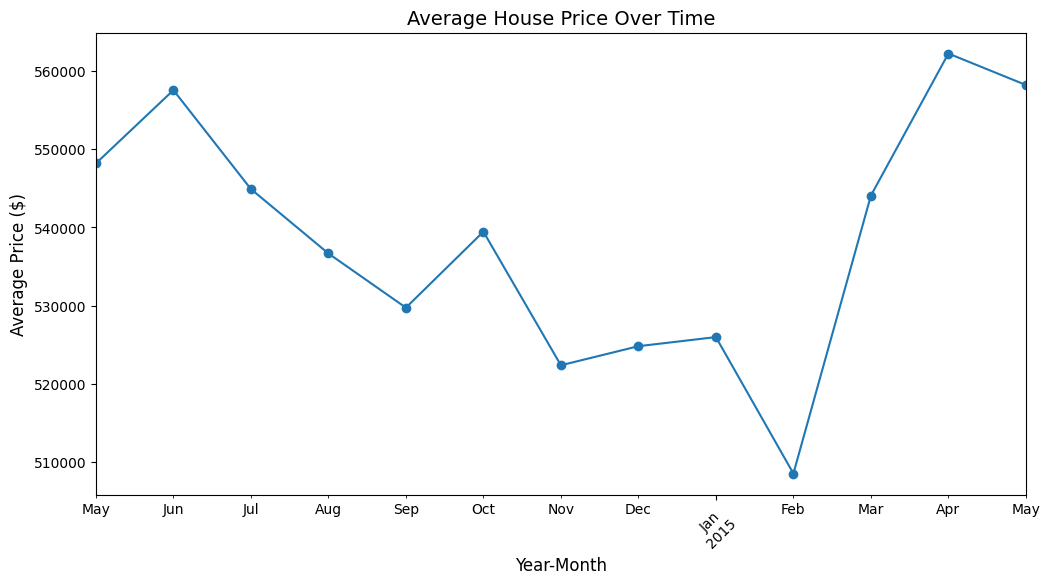

In [92]:
# Ensure 'date' column is datetime
df_house['date'] = pd.to_datetime(df_house['date'])

# Extract year-month for grouping
df_house['year_month'] = df_house['date'].dt.to_period('M')

monthly_avg_price = df_house.groupby('year_month')['price'].mean()

plt.figure(figsize=(12,6))
monthly_avg_price.plot(marker='o', linestyle='-')
plt.title('Average House Price Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:


df_house['date'] = pd.to_datetime(df_house['date'])

monthly_avg_price = (
    df_house
    .assign(year_month=df_house['date'].dt.to_period('M').dt.to_timestamp())
    .groupby('year_month', as_index=False)['price']
    .mean()
)

fig = px.line(
    monthly_avg_price,
    x='year_month',
    y='price',
    markers=True,
    labels={'year_month': 'Year-Month', 'price': 'Average Price ($)'},
    title='Average House Price Over Time'
)

fig.update_yaxes(tickformat=",")
fig.update_xaxes(dtick="M1")  # monthly ticks
fig.show()

#### Feature influence
Reasoning:
- Determine which features increase price
- Focus marketing or renovation efforts accordingly


In [93]:
# Compare price vs size with renovation status 

df_house1 = df_house[['sqft_living', 'price', 'yr_renovated']].corr()

df_house1

,sqft_living,price,yr_renovated
sqft_living,1.000,0.702,NaN
price,0.702,1.000,NaN
yr_renovated,NaN,NaN,NaN


Price vs Grade (Client Houses)
- When the grade of the houses are high... the price(profit) increases 


In [ ]:
import plotly.express as px

fig = px.box(
    df_client,
    x='grade',
    y='price',
    points='outliers',
    labels={'grade': 'Grade', 'price': 'Price ($)'},
    title='House Prices by Grade (Client Properties)'
)

fig.update_yaxes(type='log', tickformat=",")
fig.show()

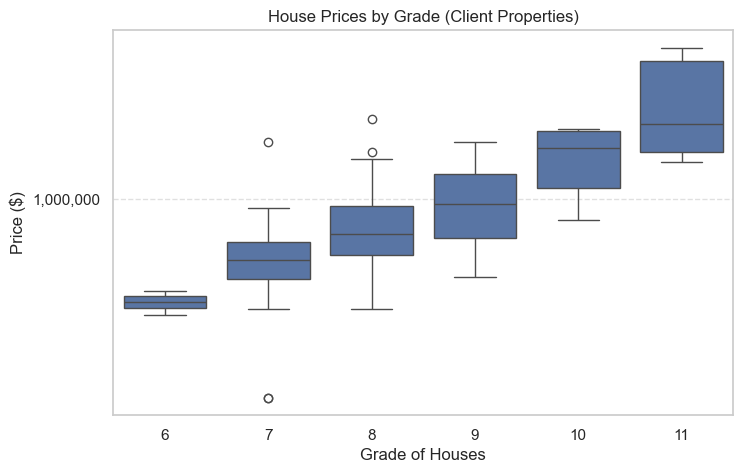

In [ ]:


plt.figure(figsize=(8, 5))

sns.boxplot(
    x='grade',
    y='price',
    data=df_client,
    showfliers=True
)

plt.title('House Prices by Grade (Client Properties)')
plt.xlabel('Grade of Houses')
plt.ylabel('Price ($)')

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Price vs View (Client Houses)

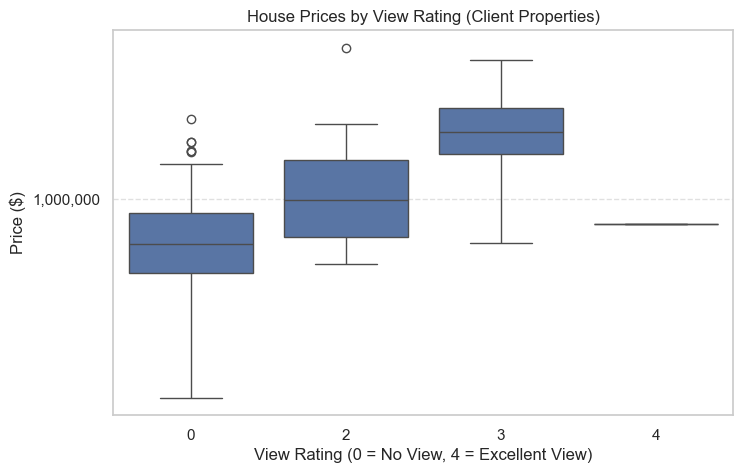

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x='view',
    y='price',
    data=df_client,
    order=sorted(df_client['view'].unique()),
    showfliers=True
)

plt.title('House Prices by View Rating (Client Properties)')
plt.xlabel('View Rating (0 = No View, 4 = Excellent View)')
plt.ylabel('Price ($)')

plt.yscale('log')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

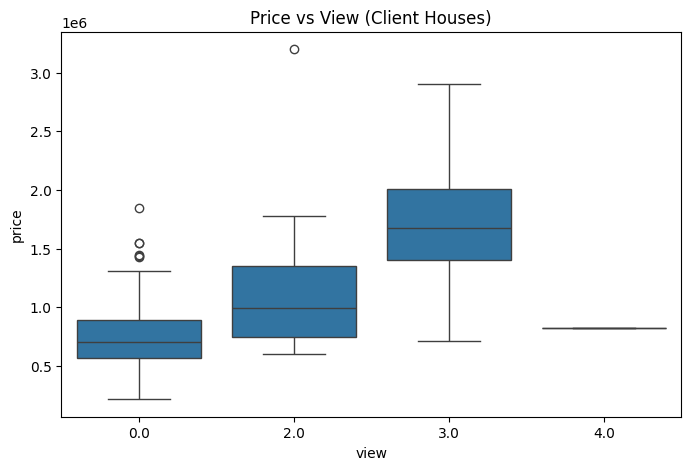

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='view', y='price', data=df_client)
plt.title('Price vs View (Client Houses)')
plt.show()


#### Renovation Impact (Client Houses)
Reasoning:
- Renovated houses may fetch higher prices
- Evaluate ROI for renovation before selling


In [40]:


# Keep only known renovation status
df_plot = df_house.dropna(subset=['yr_renovated']).copy()

# Binary flag
df_plot['renovation_status'] = df_plot['yr_renovated'].apply(
    lambda x: 'Not Renovated' if x == 0 else 'Renovated'
)


fig = px.box(
    df_plot,
    x='renovation_status',
    y='price',
    points='outliers',   # show outliers cleanly
    width=700,
    height=500,
    title='House Prices: Renovated vs Not Renovated',
    labels={
        'renovation_status': 'Renovation Status',
        'price': 'House Price ($)'
    }
)

# Log scale for skewed prices
fig.update_yaxes(type='log', tickformat=",.0f")

fig.show()

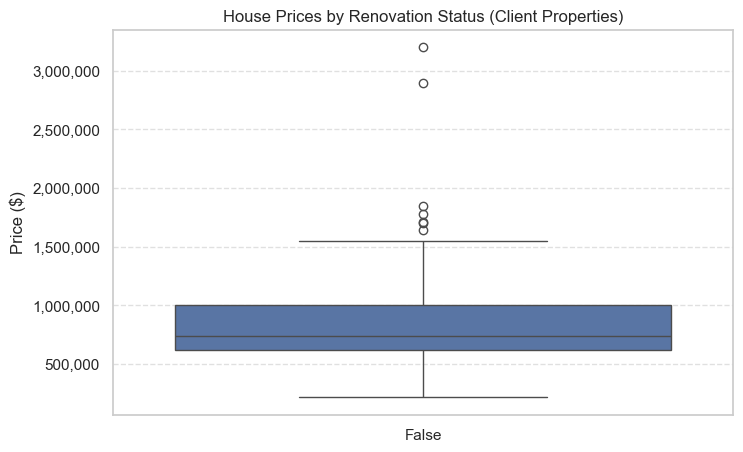

In [ ]:
df_client['renovated'] = df_client['yr_renovated'] > 0

plt.figure(figsize=(8,5))

sns.boxplot(
    x='renovated', 
    y='price', 
    data=df_client,
    showfliers=True
            
)
plt.title('House Prices by Renovation Status (Client Properties)')
plt.xlabel('')
plt.ylabel('Price ($)')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
df_client['yr_renovated'].value_counts().head(10)

yr_renovated
0    109
Name: count, dtype: int64

In [ ]:
(df_house['yr_renovated'] > 0).sum()
df_house['yr_renovated'].value_counts().head(10)


yr_renovated
0    21597
Name: count, dtype: int64

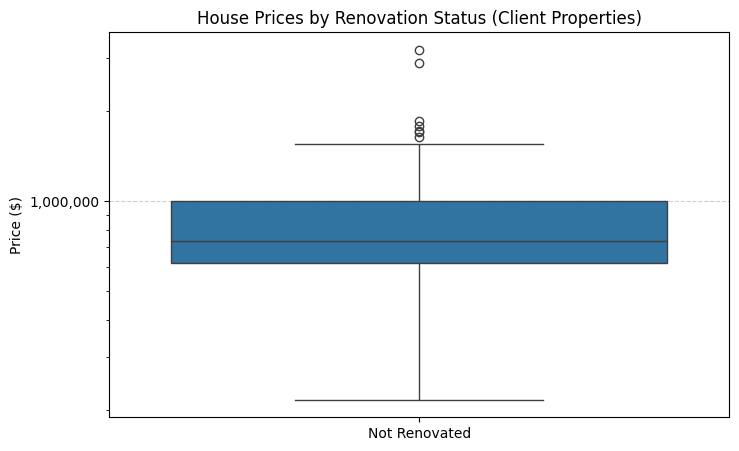

In [ ]:


plt.figure(figsize=(8, 5))

sns.boxplot(
    x='renovation_status',
    y='price',
    data=df_client,
    showfliers=True
)

plt.title('House Prices by Renovation Status (Client Properties)')
plt.xlabel('')
plt.ylabel('Price ($)')

# Handle skewed prices
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# import statsmodels.formula.api as smf

# model = smf.ols(
#     'price ~ renovated + sqft_living + grade + bedrooms',
#     data=df_client.assign(renovated=df_client['yr_renovated'] > 0)
# ).fit()

# model.summary()

#### Geographical analysis of client houses
Reasoning:
- Even within city center, some blocks yield higher prices
- Helps prioritize sales and renovation


In [ ]:
import plotly.express as px

fig = px.scatter(
    df_client,
    x='long',
    y='lat',
    color='price',
    size='price',
    color_continuous_scale='Viridis',
    labels={
        'long': 'Longitude',
        'lat': 'Latitude',
        'price': 'House Price ($)'
    },
    title='Client Properties: Price Distribution by Location',
    width=900,
    height=600
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Price ($)')
)
fig.show()

Size vs price (sanity check for expensive houses)

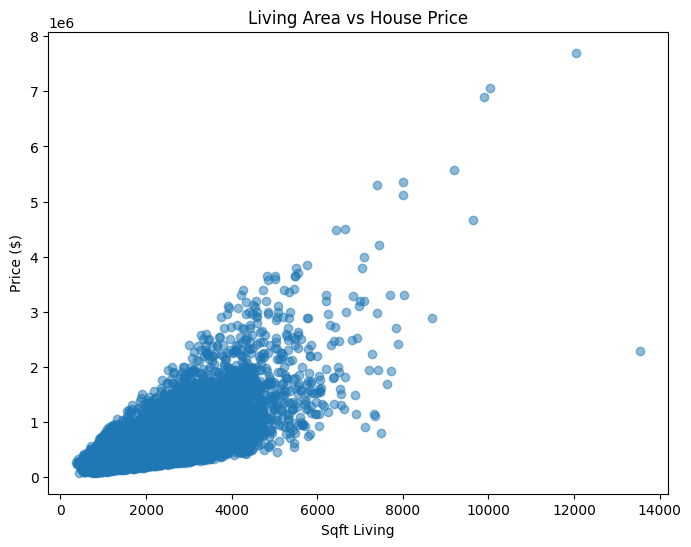

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_house['sqft_living'], df_house['price'], alpha=0.5)
plt.title('Living Area vs House Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price ($)')
plt.show()

In [17]:
df_house.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
0,2014-10-13,221900,7129300520,3,1.000,1180.000,5650.000,1,0,0,...,1180,0,1955,0,98178,47.511,-122.257,1340.000,5650.000,False
1,2014-12-09,538000,6414100192,3,2.250,2570.000,7242.000,2,0,0,...,2170,400,1951,0,98125,47.721,-122.319,1690.000,7639.000,False
2,2015-02-25,180000,5631500400,2,1.000,770.000,10000.000,1,0,0,...,770,0,1933,0,98028,47.738,-122.233,2720.000,8062.000,False
3,2014-12-09,604000,2487200875,4,3.000,1960.000,5000.000,1,0,0,...,1050,910,1965,0,98136,47.521,-122.393,1360.000,5000.000,False
4,2015-02-18,510000,1954400510,3,2.000,1680.000,8080.000,1,0,0,...,1680,0,1987,0,98074,47.617,-122.045,1800.000,7503.000,False


In [109]:
# Work on a copy
df_compare = df_plot.copy()

# Create renovation status
df_compare['renovation_status'] = pd.NA
df_compare.loc[df_compare['yr_renovated'] == 0, 'renovation_status'] = 'Not Renovated'
df_compare.loc[df_compare['yr_renovated'] > 0, 'renovation_status'] = 'Renovated'

# Exclude unknown renovation years
df_compare = df_compare.dropna(subset=['renovation_status'])

# Quick sanity check
df_compare['renovation_status'].value_counts()

renovation_status
Not Renovated    17005
Renovated          744
Name: count, dtype: int64

In [111]:
avg_price_reno = (
    df_compare
    .groupby('renovation_status')['price']
    .agg(
        count='count',
        average_price='mean',
        median_price='median'
    )
    .round(0)
)

avg_price_reno

,count,average_price,median_price
renovation_status,,,
Not Renovated,17005,530952.000,448000.000
Renovated,744,768902.000,607502.000


In [114]:
import plotly.express as px

plot_df = avg_price_reno.reset_index()

fig = px.bar(
    plot_df,
    x='renovation_status',
    y='average_price',
    text='average_price',
    title='Average Sale Price: Renovated vs Not Renovated',
    labels={
        'renovation_status': 'Renovation Status',
        'average_price': 'Average Price ($)'
    },
    width=650,
    height=450
)

fig.update_yaxes(tickformat=",.0f")
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.show()

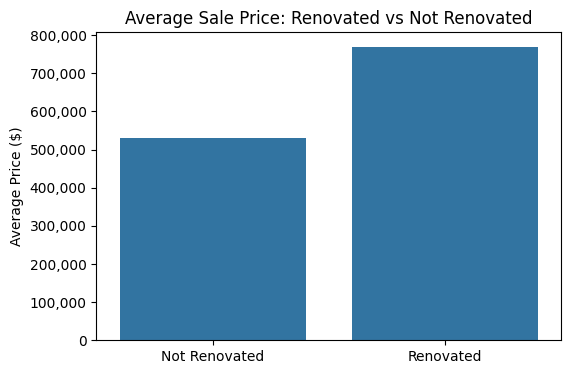

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(6,4))

sns.barplot(
    data=plot_df,
    x='renovation_status',
    y='average_price'
)

plt.title('Average Sale Price: Renovated vs Not Renovated')
plt.ylabel('Average Price ($)')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

In [120]:
city_center_zipcodes = ['98109']  # use only zipcodes that actually exist

df_cc = df_house[df_house['zipcode'].isin(city_center_zipcodes)].copy()

df_cc.shape

(109, 24)

In [121]:
df_cc['renovation_status'] = pd.NA

df_cc.loc[df_cc['yr_renovated'] == 0, 'renovation_status'] = 'Not Renovated'
df_cc.loc[df_cc['yr_renovated'] > 0, 'renovation_status'] = 'Renovated'

# Exclude unknowns
df_cc = df_cc.dropna(subset=['renovation_status'])

df_cc['renovation_status'].value_counts()

renovation_status
Not Renovated    109
Name: count, dtype: int64

In [123]:
city_center_summary = (
    df_cc
    .groupby('renovation_status')['price']
    .agg(
        count='count',
        average_price='mean',
        median_price='median'
    )
    .round(0)
)

city_center_summary

,count,average_price,median_price
renovation_status,,,
Not Renovated,109,880078.000,736000.000


In [125]:
import plotly.express as px

fig = px.bar(
    plot_df,
    x='renovation_status',
    y='average_price',
    text='average_price',
    title='City Center: Average Price by Renovation Status',
    labels={
        'renovation_status': 'Renovation Status',
        'average_price': 'Average Sale Price ($)'
    },
    width=650,
    height=450
)

fig.update_yaxes(tickformat=",.0f")
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.show()

In [70]:
df_renovation = df_plot.copy()

df_renovation

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


In [71]:
df_renovation = df_renovation.drop(columns=['id', 'id.1'])

In [47]:
df_renovation

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
0,2014-10-13,221900,7129300520,3,1.000,1180.000,5650.000,1,0,0,...,1180,0,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,False
1,2014-12-09,538000,6414100192,3,2.250,2570.000,7242.000,2,0,0,...,2170,400,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,False
2,2015-02-25,180000,5631500400,2,1.000,770.000,10000.000,1,0,0,...,770,0,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,False
3,2014-12-09,604000,2487200875,4,3.000,1960.000,5000.000,1,0,0,...,1050,910,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,False
4,2015-02-18,510000,1954400510,3,2.000,1680.000,8080.000,1,0,0,...,1680,0,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000,263000018,3,2.500,1530.000,1131.000,3,0,0,...,1530,0,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,False
21593,2015-02-23,400000,6600060120,4,2.500,2310.000,5813.000,2,0,0,...,2310,0,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,False
21594,2014-06-23,402101,1523300141,2,0.750,1020.000,1350.000,2,0,0,...,1020,0,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,False
21595,2015-01-16,400000,291310100,3,2.500,1600.000,2388.000,2,0,0,...,1600,0,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,False


In [41]:
df_renovation['date'] = pd.to_datetime(df_renovation['date'], format='%Y-%m-%d')

In [56]:
df_renovation.isna().sum()

date                  0
price                 0
house_id              0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated       3848
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
bedroom_outlier       0
dtype: int64

In [43]:
# # Numeric columns
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement',
            'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'price']

df_renovation[num_cols] = df_renovation[num_cols].fillna(df_renovation[num_cols].median())

# Categorical columns
cat_cols = ['waterfront', 'zipcode']
for col in cat_cols:
    df_renovation[col] = df_renovation[col].fillna(df_renovation[col].mode()[0])

# #Fix yr_renovated
# df_renovation['yr_renovated'] = pd.to_numeric(df_renovation['yr_renovated'], errors='coerce').fillna(0)
# df_renovation.loc[df_house['yr_renovated'] > 2025, 'yr_renovated'] = 0
# df_renovation['yr_renovated'] = df_renovation['yr_renovated'].astype(int)

# Date column
df_renovation['date'] = pd.to_datetime(df_renovation['date'])  # automatically parses correctly

In [46]:
# Convert columns to int
cols_to_int = [
    'price', 'house_id', 'bedrooms', 'floors',
    'waterfront', 'view', 'grade',
    'sqft_above', 'sqft_basement',
    'yr_built', 'zipcode'
]

df_renovation[cols_to_int] = df_renovation[cols_to_int].round(0).astype(int)



# Handle bedroom outliers
df_renovation['bedroom_outlier'] = df_renovation['bedrooms'] > 10

# Zipcode as category
df_renovation['zipcode'] = df_renovation['zipcode'].astype(str)

In [54]:
current_year = 2025  # or datetime.now().year

# 1) Convert to numeric safely
yr = pd.to_numeric(df_renovation['yr_renovated'], errors='coerce')

# 2) Fix only values with the scaling issue (e.g. 20150 → 2015)
mask_scaled = (
    yr.notna() &
    (yr > current_year) &
    (yr % 10 == 0)
)

yr.loc[mask_scaled] = yr.loc[mask_scaled] / 10

# 3) Mark still-impossible years as NA (do NOT force to 0)
yr.loc[
    (yr < 0) |
    (yr > current_year),
] = pd.NA

# 4) Convert to nullable integer (keeps NA)
df_renovation['yr_renovated'] = yr.astype('Int64')

In [52]:
central_zipcodes = ['98101', '98104', '98109']  # example zipcodes
df_client1 = df_renovation[df_renovation['zipcode'].isin(central_zipcodes)]

df_client1

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_outlier
146,2014-06-25,890000,809001525,4,1.000,2550.000,4000.000,2,0,0,...,2370,180,1905,0,98109,47.635,-122.353,2200.000,4000.000,False
568,2014-10-22,610000,809002765,3,1.000,1180.000,3400.000,2,0,0,...,1180,0,1907,0,98109,47.638,-122.353,1440.000,3400.000,False
1064,2015-01-23,550000,809001070,3,1.000,1520.000,2500.000,2,0,0,...,1520,0,1912,0,98109,47.635,-122.352,1880.000,3600.000,False
1096,2015-05-13,453500,5457300478,2,1.750,1000.000,1760.000,1,0,0,...,600,400,1924,<NA>,98109,47.626,-122.355,2120.000,2802.000,False
1147,2014-08-08,725000,809002435,3,2.500,1940.000,4000.000,2,0,0,...,1940,0,1906,<NA>,98109,47.637,-122.352,1440.000,4000.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,2015-03-31,600000,3528900771,3,3.250,1690.000,1473.000,2,0,0,...,1380,310,2008,0,98109,47.640,-122.345,1670.000,2594.000,False
20917,2015-04-23,1550000,2652501565,3,3.250,3530.000,4920.000,2,0,0,...,2660,870,2015,<NA>,98109,47.641,-122.357,1900.000,4200.000,False
20934,2015-03-23,605000,1689401526,3,2.500,1500.000,1119.000,3,0,2,...,1110,0,2008,<NA>,98109,47.633,-122.346,1500.000,1057.000,False
21001,2014-07-23,550000,1972205633,3,2.000,1420.000,1369.000,2,0,0,...,1340,80,2007,0,98109,47.647,-122.357,1540.000,2168.000,False


In [53]:
df_renovation['yr_renovated'].describe()

count   17749.000
mean       83.665
std       400.011
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      2015.000
Name: yr_renovated, dtype: Float64

In [ ]:
# central_zipcodes = [98109, 98101, 98104, 98119,]

# df_house['central_area'] = df_house['zipcode'].isin(central_zipcodes)

# df_house.boxplot(column='price', by='central_area', figsize=(8,6))
# plt.title('Price: Central vs Non-Central Areas')
# plt.suptitle('')
# plt.xlabel('Central Area')
# plt.ylabel('Price')
# plt.show()


In [63]:
central_zipcodes = ['98101', '98104', '98109']

# make sure zipcode type matches
df_renovation['zipcode'] = df_renovation['zipcode'].astype(str)
central_zipcodes = list(map(str, central_zipcodes))

# filter city center (mask + filtering on SAME df)
df_client1 = df_renovation.loc[
    df_renovation['zipcode'].isin(central_zipcodes)
].copy()


df_client1['renovation_status'] = pd.NA
df_client1.loc[df_client1['yr_renovated'].eq(0), 'renovation_status'] = 'Not Renovated'
df_client1.loc[df_client1['yr_renovated'].gt(0), 'renovation_status'] = 'Renovated'

df_client1 = df_client1.dropna(subset=['renovation_status'])

city_center_price_summary = (
    df_client1.groupby('renovation_status')['price']
    .agg(count='count', average_price='mean')
    .round(0)
)

city_center_price_summary

,count,average_price
renovation_status,,
Not Renovated,81,849803.000
Renovated,7,967136.000


In [ ]:
import plotly.express as px
fig = px.bar(
    city_center_price_summary,
    x='',
    y='average_price',
    text='average_price',
    title='City Center: Average Price (Renovated vs Not Renovated)',
    labels={'renovation_status': 'Renovation Status', 'average_price': 'Average Price ($)'},
    width=650,
    height=450
)

fig.update_yaxes(tickformat=",.0f")
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.show()